In [1]:
from brian2 import *

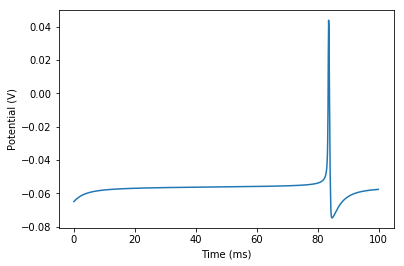

In [3]:
start_scope()

duration = 100*ms

area = 20000*umetre**2
VL = -65*mV
VK = -77*mV
VNa = 55*mV
C = 1*ufarad*cm**-2 * area
gL = 0.3*msiemens*cm**-2 * area
gNa = 40*msiemens*cm**-2 * area
gK = 35*msiemens*cm**-2 * area
VT = -63*mV

#Equation for the standard HH neuron from https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model with voltage-gated channels.
eqs = Equations('''
                    dV/dt = (I - gK*(n**4)*(V-VK) - gNa*h*(m**3)*(V-VNa) - gL*(V-VL))/C : volt
                    dm/dt = am*(1-m) - bm*m : 1
                    dn/dt = an*(1-n) - bn*n : 1
                    dh/dt = ah*(1-h) - bh*h : 1
                    
                    am = 0.32*(mV**-1)*(13*mV-V+VT)/(exp((13*mV-V+VT)/(4*mV))-1)/ms : 1/second
                    bm = 0.28*(mV**-1)*(V-VT-40*mV)/(exp((V-VT-40*mV)/(5*mV))-1)/ms : 1/second
                    an = 0.032*(mV**-1)*(15*mV-V+VT)/(exp((15*mV-V+VT)/(5*mV))-1)/ms : 1/second
                    bn = 0.5*exp((10*mV-V+VT)/(40*mV))/ms : 1/second
                    ah = 0.128*exp((17*mV-V+VT)/(18*mV))/ms : 1/second
                    bh = 4/(1+exp((40*mV-V+VT)/(5*mV)))/ms : 1/second
                    #Parameters from the Neural Dynamics online book
                    #am = (0.182*(ms**-1)*(mV**-1)*(V+35*mV)/(1-exp(-(V-35*mV)/9*mV)))
                    #an = (0.02*(ms**-1)*(mV**-1)*(V-25*mV)/(1-exp(-(V-25*mV)/9*mV)))
                    #ah = (0.25*(ms**-1)*exp(-(V+90*mV)/12*mV))
                    #bm = ((-0.124*(ms**-1)*(mV**-1)*(V+35*mV))/(1-exp((V+35*mV)/9*mV)))
                    #bn = ((-0.002*(ms**-1)*(mV**-1)*(V-25*mV))/(1-exp((V-25*mV)/9*mV)))
                    #bh = ((0.25*(ms**-1)*(mV**-1)*exp((V+62*mV)/6*mV))/(exp((V+90*mV)/12*mV)))
                    I : amp   
                ''')



group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

group.V = VL
group.I = '0.41*nA'

M = StateMonitor(group, 'V', record=True)

run(duration)

plot(M.t/ms, M.V[0])
xlabel('Time (ms)')
ylabel('Potential (V)')
show()

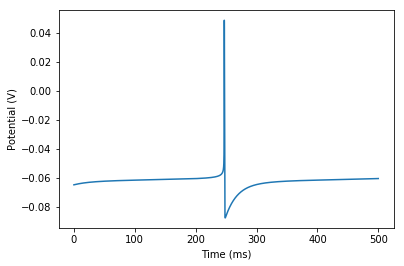

In [4]:
start_scope()
duration = 500*ms

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area


# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,                    
                    method='exponential_euler')
group.v = El
group.I = '0.02*nA'

M = StateMonitor(group, 'v', threshold='v > -40*mV',
                    refractory='v > -40*mV', record=True)

run(duration)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Potential (V)')
show()